<a href="https://colab.research.google.com/github/FariusGitHub/DataScience/blob/master/Zalando.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
    <img src="https://media-exp1.licdn.com/dms/image/C4E0BAQGQ65Yl7rn-Og/company-logo_200_200/0/1612547658975?e=2159024400&v=beta&t=pzTFuHPYw1kBh_HZPoz4MhlosU8jiLp6V32zUh4GW1o" width='30%'> 
</center>

----------

<h1 align="center"> Logistic Regression </h1><br>
<h1 align="center"> <font size='4'>  May 16, 2021 </font><font size='4'>Farius Tjioesman </font></h1><br>

----------

## Classification API

- Simple way to train fashion dataset from TensorFlow Fashion MNIST
    - https://www.tensorflow.org/datasets/catalog/fashion_mnist

- Image Pre-Processing Reference from Pillow
    - https://auth0.com/blog/image-processing-in-python-with-pillow/
    

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as img
# %matplotlib inline
# from IPython.display import display, Image

from sklearn.linear_model import LogisticRegression
from keras.preprocessing.image import img_to_array

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist, fashion_mnist

from PIL import Image, ImageEnhance
import matplotlib.pyplot as plt
import urllib.request
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Fashion MNIST Dataset

Downloading 70K examples for labeled fashion classification split into train and test dataset

In [ ]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

## 60K dataset was allocated to train dataset (each image has 28 x 28 pixels resolution)

In [ ]:
X_train.shape

(60000, 28, 28)

## 10K dataset was allocated to test dataset (also with 28 x 28 pixel resolution)

In [ ]:
X_test.shape

(10000, 28, 28)

## Example of 8th dataset (a sandal with grayscale values and jpg preview)

  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 

  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 

  0   0   0   0   0   0   0   0   0   0   0   0   1   3   1   0   0   1   1   0   0   0   0  58   0  39   1   0 

  0   0   0   0   0   0   0   0   0   0   0   0   1   3   0   0   0   0   0   0   0  64 109 146 192 193   7   0 

  0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0  94  38  99 209 183 229 192 142  48   0   0   0 

  0   0   0   0   0   0   0   0   0   1   0   0   0   0  41  45 158 146 164 114  51   1  53 105  42  36   0   0 

  0   0   0   0   0   0   0   0   0   0   0   0  10  68  44  30  59 172 146   0  22   0  13 103 111 103   0   0 

  0   0   0   0   0   0   0   0   0   3   1   0  22  61  88 152 255  71   0   0   0   0  35  85 112 201  44   0 

  0   0   0   0   0   0   0   0   0   1   0   0  13  62 154  62   0   0   0   0   0   0 

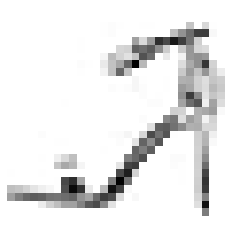

In [ ]:
# grayscale value
example = 8
for i in range(28):
    for j in list(X_train[example][i]):
      print('  '[:3-len(str(j))]+str(j), end=' ')
    print('\n')

# grayscale image    
plt.imshow(X_train[example], cmap='gray_r')
plt.axis('off');


## Build new list class_names based on TensorFlow website (Zalando Research Germany)

<center>
    <img src="https://www.researchgate.net/profile/Greeshma-K-V/publication/340299295/figure/fig1/AS:875121904476163@1585656729996/Fashion-MNIST-Dataset-Images-with-Labels-and-Description-II-LITERATURE-REVIEW-In-image.jpg](attachment:image.png" width='100%'> 
</center>

In [ ]:
class_names = 't-shirt trouser pullover dress coat sandal shirt sneaker bag boot'.split()
class_names

['t-shirt',
 'trouser',
 'pullover',
 'dress',
 'coat',
 'sandal',
 'shirt',
 'sneaker',
 'bag',
 'boot']

### Check data distribution between 60K train dataset (each class was equally represented)

In [ ]:
for i in range (10):
    print(class_names[pd.Series(y_train).value_counts().keys()[i]],"    \t\t",\
          pd.Series(y_train).value_counts().values[i])

boot     		 6000
bag     		 6000
sneaker     		 6000
shirt     		 6000
sandal     		 6000
coat     		 6000
dress     		 6000
pullover     		 6000
trouser     		 6000
t-shirt     		 6000


## Train the Model
-  Preprocessed the data by transforming 2D images (a matrix) into 1D (a list) 
-  Get overall accuracy Logistic regression score

In [ ]:
# Example of reshape data into 1d for sklearn Logistic Regresion

X_TRAIN = X_train.reshape(60000, -1)
X_TEST = X_test.reshape(10000, -1)

print('data shape before reshape', X_train.shape)
print('data shape after reshape', X_TRAIN.shape)

data shape before reshape (60000, 28, 28)
data shape after reshape (60000, 784)


In [ ]:
# Training the model
lr = LogisticRegression()
lr.fit(X_TRAIN, y_train)

# Assessing the model
lr.score(X_TEST, y_test)

0.8412

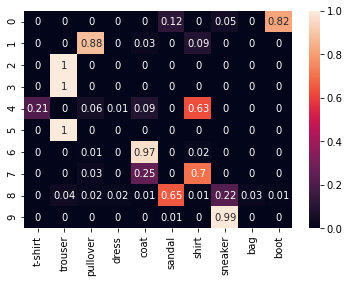

In [ ]:
# Example of first ten dataset probabilistic classification : 10K in total

df = pd.DataFrame(lr.predict_proba(X_TEST)).rename(columns={0:class_names[0],1:class_names[1],2:class_names[2]})\
.rename(columns={3:class_names[3],4:class_names[4],5:class_names[5],6:class_names[6]})\
.rename(columns={7:class_names[7],8:class_names[8], 9:class_names[9]}).round(2).head(10)

sns.heatmap(df, annot=True);



<img src="https://1000logos.net/wp-content/uploads/2020/08/Shopify-Logo.png" width='10%'>

----------

<h1 align="center"> Logistic Regression Application </h1><br>

In [ ]:
# EXAMPLE APPLICATION TO SOME EXTERNAL DATASET 
data=pd.read_csv('https://farius.s3.us-east-2.amazonaws.com/cytopia/shopify.csv')

data=data[data["product_id"].isin(['42,556,209', '425,565,135', '425,563,466',\
    '425,563,521', '425,564,251', '425,565,072', '425,565,784'])]

def make_square(im, fill_color=(255, 255, 255, 255)):   #255 to fill with white
    x, y = im.size
    size = max(x, y)
    new_im = Image.new('RGBA', (size, size), fill_color)
    new_im.paste(im, (int((size - x) / 2), int((size - y) / 2)))
    return new_im

for k in range(len(data)):
    imgURL = data.iloc[k][2]
    urllib.request.urlretrieve(imgURL, "temp.jpg")
    im0 = Image.open("temp.jpg")                   # LOAD IMAGE
    im1 = make_square(im0.convert('LA'))           # SQUARED, MAINTAINED ASPECT RATIO, GRAY SCALED
    im2 = im1.resize((28, 28)).rotate(90)          # 28x28 RESIZE, ROTATE TO ANTICIPATE TRANSPOSE
    im3 = ImageEnhance.Brightness(im2).enhance(1)  # CLEANING NOISE, HIGHER ENHANCE IS BETTER
    im4 = 255-img_to_array(im3).T                  # CONVERTING GRAY SCALE, ARRAY, TRANSPOSED

    display(im3.rotate(-90))
    # plt.imshow(im4[1], cmap='gray_r')
    # plt.axis('off');

    im5 = im4.reshape(784,-1).T                    # JPG TO ARRAY + FLATTENING
    im6 = lr.predict_proba(im5)                    # prediction by probability
    im7 = (im6).tolist()[0]           

    for i in range(len(class_names)):
        print(class_names[i], '     \t',\
              int(im7[i]*10000)/100)

t-shirt      	 1.86
trouser      	 0.35
pullover      	 0.14
dress      	 0.0
coat      	 0.0
sandal      	 0.0
shirt      	 0.07
sneaker      	 0.0
bag      	 97.47
boot      	 0.07


t-shirt      	 3.92
trouser      	 9.19
pullover      	 1.07
dress      	 0.08
coat      	 0.0
sandal      	 0.0
shirt      	 0.07
sneaker      	 14.62
bag      	 39.27
boot      	 31.74


t-shirt      	 1.68
trouser      	 2.78
pullover      	 0.03
dress      	 0.0
coat      	 0.0
sandal      	 0.0
shirt      	 0.0
sneaker      	 1.21
bag      	 92.48
boot      	 1.78


t-shirt      	 0.09
trouser      	 0.0
pullover      	 0.0
dress      	 0.0
coat      	 0.0
sandal      	 0.0
shirt      	 0.07
sneaker      	 0.0
bag      	 99.82
boot      	 0.0


t-shirt      	 0.51
trouser      	 0.11
pullover      	 0.23
dress      	 0.01
coat      	 0.0
sandal      	 0.41
shirt      	 0.6
sneaker      	 0.0
bag      	 98.05
boot      	 0.04


t-shirt      	 10.22
trouser      	 0.67
pullover      	 1.3
dress      	 0.17
coat      	 0.02
sandal      	 0.08
shirt      	 14.65
sneaker      	 0.02
bag      	 72.64
boot      	 0.16


t-shirt      	 10.67
trouser      	 1.24
pullover      	 1.53
dress      	 0.17
coat      	 0.02
sandal      	 0.1
shirt      	 17.54
sneaker      	 0.03
bag      	 68.16
boot      	 0.49


In [ ]:
# DARK THEME FOR MY JUPYTER NOTEBOOK
# from jupyterthemes import get_themes
# import jupyterthemes as jt
# from jupyterthemes.stylefx import set_nb_theme

# set_nb_theme('chesterish')